In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from PIL import Image

### Data Loading and Processing

In [2]:
df = pd.read_csv('data.csv').drop(columns=['J-D','D-N','DJF','MAM','JJA','SON'])

In [3]:
df['temp'] = df.iloc[:, 1:].mean(axis=1)

### Benchmark Picture

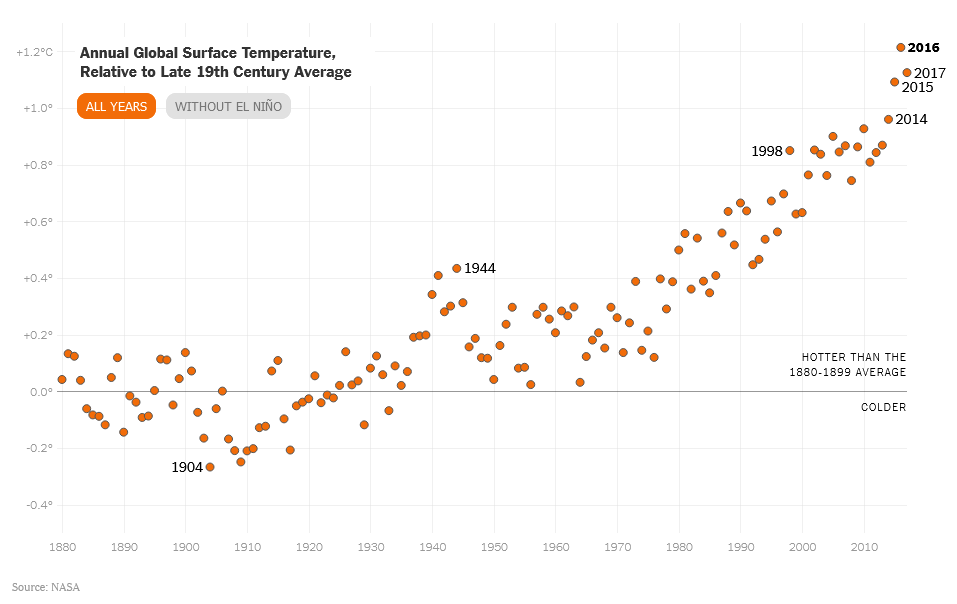

In [4]:
Image.open("thumbnail.png")

### Matplotlib Visualization

In [5]:
def temperature_ticks_maker(ticks):
    
    """Creating formatted ticks labels"""
    
    labels = ["+{:2.1f}°".format(i) if i > 0 else "{:2.1f}°".format(i)  for i in ticks]
    labels[-2] += 'C'
    
    return labels  

In [6]:
# Special text labels data
years_to_text = [1904, 1944, 1998, 2014, 2015, 2016, 2017]
offsets = [-1, 1, -1, 1, -1, 1, 1]
temps_to_text = df[df['Year'].isin(years_to_text)]['temp']
to_text_coords = list(zip(years_to_text, temps_to_text, offsets))

In [7]:
# True to fix metrics, False otherwise
METRIC_FIX = True

<ipython-input-8-2ec9a2d32840>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(temperature_ticks_maker(ax.yaxis.get_ticklocs()))


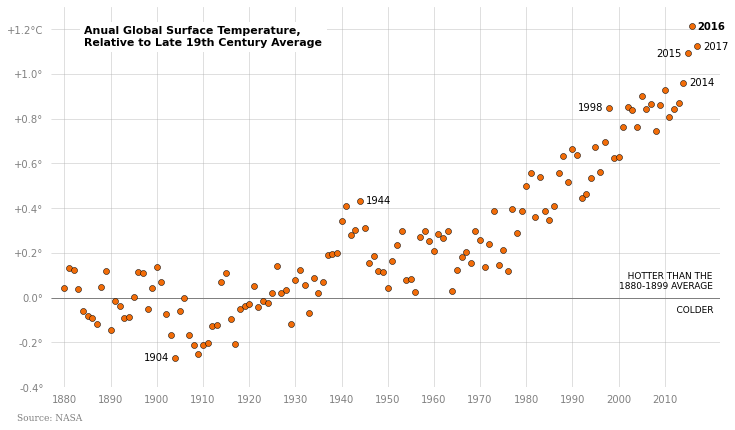

In [8]:
# Setting data
x = df['Year']
y = df['temp'] if not METRIC_FIX else df['temp'] + 0.2275

fig = plt.figure(figsize = (12, 7))
fig.patch.set_facecolor('white')

ax = fig.add_subplot(111)

# Hide plot frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add horizontal zero line
plt.hlines(0, min(x) - 3, max(x) + 5, color='gray', linewidth=1, zorder=1)

# Add data points
ax.scatter(x, y, c = '#f26c08', edgecolor='black', linewidth=0.5)

# Limit axes
ax.set_ylim((-0.6, 1.2)) if not METRIC_FIX else ax.set_ylim((-0.4, 1.3))
ax.set_xlim((min(x) - 3, max(x) + 5))

# Hide grid under the data points
ax.set_axisbelow(True)

# Format ticks
ax.set_xticks(np.arange(min(x), max(x), 10))
ax.yaxis.set_ticklabels(temperature_ticks_maker(ax.yaxis.get_ticklocs()))

ax.tick_params(axis='y', color='white', labelcolor='gray')
ax.tick_params(axis='x', color='white', labelcolor='gray')

# Add grid
ax.grid(alpha=0.5)

# Add texts for points
for y, t, o in to_text_coords:
    t = t if not METRIC_FIX else t + 0.2275
    if y == 2016:
        ax.annotate(str(y), xy =(o*4 + y, t), weight='bold', ha='center', va='center', size=10)
    else:
        ax.annotate(str(y), xy =(o*4 + y, t), ha='center', va='center', size=10)
        
# Add side line text     
ax.text(2000, 0.04, "   HOTTER THAN THE\n1880-1899 AVERAGE", size=9)
ax.text(2010, -0.065, "    COLDER", size=9)

# Add plot title
props = dict(facecolor='white', alpha=1, edgecolor='white')

ax.text(0.05, 0.95, 'Anual Global Surface Temperature,\nRelative to Late 19th Century Average',
        transform=ax.transAxes, fontsize=11, weight='bold', family = 'sans-serif',
        verticalalignment='top', bbox=props)

# Add source text
ax.text(-0.05, -0.07, 'Source: NASA',
        transform=ax.transAxes, color = 'gray', fontsize=9, family = 'serif',
        verticalalignment='top', bbox=props)

plt.show()

In [9]:
# Save figure
fig.savefig('matplotlib plot result')